In [9]:
import qiskit
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import *

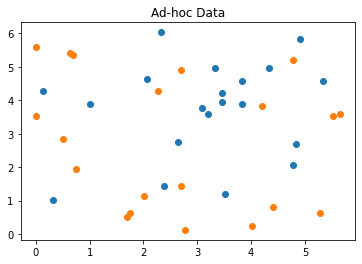

In [12]:
feature_dim = 2
train_dataset_size = 20
test_dataset_size = 10
random_seed = 10598
shot = 10000

sample_Total,training_input,test_input,class_labels = ad_hoc_data(training_size = train_dataset_size,
                                                                test_size = test_dataset_size,
                                                                 gap = 0.3,
                                                                 n = 2,
                                                                 plot_data = True)

datapoints,class_to_label = split_dataset_to_data_and_labels(test_input)

In [13]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(2, reps=2)
svc =QSVM(feature_map,training_input,test_input,None)
svc.random_seed = random_seed
quantum_instance = QuantumInstance(backend,shots = shot, seed_simulator = random_seed,seed_transpiler = random_seed)
result = svc.run(quantum_instance)

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/algorithms/classifiers/qsvm/qsvm.py:102: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms.classifiers (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.classifiers',
/opt/conda/lib/python3.8/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',


kernel matrix during the training


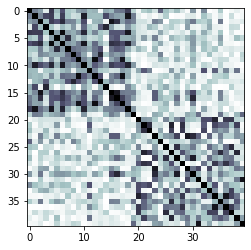

In [15]:
print("kernel matrix during the training")
kernel_matrix = result["kernel_matrix_training"]
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation = 'nearest',origin = 'upper',cmap = 'bone_r') 

In [17]:
predicted_labels = svc.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels, svc.label_to_class)


In [18]:
print("ground truth: {}".format(datapoints[1]))
print("ground truth: {}".format(predicted_labels))
print("testing success ratio: ",result['testing_accuracy'])

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
ground truth: [0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
testing success ratio:  0.95
